In [2]:
import numpy as np

import pandas as pd
import os

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import matplotlib.pyplot as plt

In [3]:
def load_mfcc_files(directory):
    mfcc_data = []
    for file in os.listdir(directory):
            print(file)
            file_path = os.path.join(directory, file)
            data = pd.read_csv(file_path, header=None).values
            mfcc_data.append(data)
            print(data.shape)
    return mfcc_data

# Load MFCC data
asha = load_mfcc_files(r"D:\mahima files\short data aug\ab")            #path to augmented files generated
bhavgeet = load_mfcc_files(r"D:\mahima files\short data aug\bhav")
kishor = load_mfcc_files(r"D:\mahima files\short data aug\kk")
lavni = load_mfcc_files(r"D:\mahima files\short data aug\lavni")
michael = load_mfcc_files(r"D:\mahima files\short data aug\mj")
national = load_mfcc_files(r"D:\mahima files\short data aug\na")


print(f"Asha Bhosle: {len(asha)} files")
print(f"Bhavgeet: {len(bhavgeet)} files")
print(f"Kishor Kumar: {len(kishor)} files")
print(f"Lavni: {len(lavni)} files")
print(f"Michael Jackson: {len(michael)} files")
print(f"National Anthem: {len(national)} files")

aug_1_Aaiye Meharban - Howrah Bridge 1958 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Aaja Aaja - Yeh Raaste Hain Pyaar Ke 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Aao Huzoor Tumko - Kismet 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Aasmaa - Saand Ki Aankh 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Aise Jalta Hai Jiya - 1920 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Allahu - Dev 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Andhere - 31st October 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Ankh Milaoongi - Fiza 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Baila Baila - Khwahish 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Bhanwara Bada Nadan Asha Bhosle - Sahib Bibi Aur Ghulam 128 Kbps_MFCC.csv
(20, 25000)
aug_1_bollywood_MKS 1978 - O Saathi Re Tere Bina-Female_MFCC.csv
(20, 25000)
aug_1_bollywood_MS 1966 - Jhumka Gira Re_MFCC.csv
(20, 25000)
aug_1_bollywood_Rangeela 1995 - Tanha Tanha Yahan Pe_MFCC.csv
(20, 25000)
aug_1_bollywood_STK 1982 - Kitne Bhi Tu(Female)_MFCC.csv
(20, 25000)
aug_1_bollywood_UJ 1981 - Dil Cheez Kya Hai_MFCC.csv
(20, 25000)
aug_1_

In [4]:
asha = np.array(asha,dtype='float32')
bhavgeet = np.array(bhavgeet,dtype='float32')
kishor=np.array(kishor,dtype='float32')
lavni=np.array(lavni,dtype='float32')
michael=np.array(michael,dtype='float32')
national=np.array(national,dtype='float32')

print(asha.shape)
print(bhavgeet.shape)
print(kishor.shape)
print(lavni.shape)
print(michael.shape)
print(national.shape)


(125, 20, 25000)
(125, 20, 25000)
(125, 20, 25000)
(125, 20, 25000)
(125, 20, 25000)
(125, 20, 25000)


In [5]:
import numpy as np
import pandas as pd
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split

# Combine data and labels into a DataFrame
data = np.concatenate((asha, bhavgeet, kishor, lavni, michael, national), axis=0)
labels = ['asha'] * len(asha) + ['bhavgeet'] * len(bhavgeet) + ['kishor'] * len(kishor) + ['lavni'] * len(lavni) + ['michael'] * len(michael) + ['national'] * len(national)

# Create a DataFrame with data and labels
df = pd.DataFrame(data.reshape(data.shape[0], -1))  # Flatten data to 2D for DataFrame
df['label'] = labels

# Apply Binary Encoding to the 'label' column
encoder = BinaryEncoder()
y_encoded = encoder.fit_transform(df['label'])

# Separate original data (X) and encoded labels (y)
X = df.drop(columns=['label']).values.reshape(data.shape)  # Reshape to original data shape
y = y_encoded.values  # Encoded labels in binary format

# Split data into training, test, and validation sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# Verify shapes
print(f"x_train shape: {x_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"Sample of binary-encoded labels (y_train): {y_train[:5]}")

x_train shape: (450, 20, 25000)
x_val shape: (150, 20, 25000)
x_test shape: (150, 20, 25000)
y_train shape: (450, 3)
Sample of binary-encoded labels (y_train): [[0 0 1]
 [0 0 1]
 [1 0 1]
 [1 1 0]
 [0 0 1]]


In [6]:
# Combine data from different categories
data = np.concatenate((asha, bhavgeet, kishor, lavni, michael, national), axis=0)

# Create labels
labels = ['asha'] * len(asha) + ['bhavgeet'] * len(bhavgeet) + ['kishor'] * len(kishor) + ['lavni'] * len(lavni) + ['michael'] * len(michael) + ['national'] * len(national)


In [7]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models, callbacks
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have your features (X) and labels (y) already prepared in the correct format

# Check if the labels are one-hot encoded, i.e., if they have more than one dimension
def check_and_convert_labels(y):
    # If the labels are one-hot encoded (i.e., a 2D array), convert them to single labels
    if y.ndim > 1 and y.shape[1] > 1:
        return np.argmax(y, axis=1)  # Convert from one-hot to single label
    return y  # Return as is if it's already in the correct format

# Convert labels (y_train, y_val, y_test) to single labels if necessary
y_train = check_and_convert_labels(y_train)
y_val = check_and_convert_labels(y_val)
y_test = check_and_convert_labels(y_test)

# Build the CNN model for feature extraction
def build_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv1D(32, 8, activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(2, padding='same'))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv1D(64, 5, activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(2, padding='same'))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv1D(128, 5, activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(2, padding='same'))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(6, activation='softmax'))  # Assuming 6 classes for classification
    return model

input_shape = (20, 25000)  # Adjusted to match the input data shape
cnn_model = build_cnn_model(input_shape)

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape the data to match the input shape of the model
x_train = x_train.reshape(-1, 20, 25000)
x_val = x_val.reshape(-1, 20, 25000)
x_test = x_test.reshape(-1, 20, 25000)

# Define early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train the CNN model with early stopping
cnn_model.fit(x_train, y_train, epochs=200, batch_size=16, validation_data=(x_val, y_val), callbacks=[early_stopping, lr_scheduler])

# Assuming X_test and y_test are your test data and labels
X_test = x_test.astype(np.float32)
y_test = y_test.astype(np.int32)  # Ensure y_test is integer type for sparse_categorical_crossentropy

# Evaluate the model on the test data
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, batch_size=32)

# Print the test accuracy
print(f"Test accuracy: {test_accuracy}")
cnn_model.summary()

# Predict the labels for the test set
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels if necessary

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Print detailed classification report
print(classification_report(y_test, y_pred_classes))


c:\Users\Dnyaneshwari\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 272ms/step - accuracy: 0.2717 - loss: 2.5537 - val_accuracy: 0.2800 - val_loss: 7.3964 - learning_rate: 0.0010
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - accuracy: 0.3991 - loss: 1.9532 - val_accuracy: 0.3000 - val_loss: 4.3109 - learning_rate: 0.0010
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - accuracy: 0.5554 - loss: 1.4856 - val_accuracy: 0.4000 - val_loss: 3.0291 - learning_rate: 0.0010
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - accuracy: 0.6381 - loss: 1.3128 - val_accuracy: 0.5000 - val_loss: 1.4564 - learning_rate: 0.0010
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 206ms/step - accuracy: 0.6076 - loss: 1.2895 - val_accuracy: 0.6133 - val_loss: 1.1153 - learning_rate: 0.0010
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - accuracy: 0.6538 - loss: 1.2276 - val_accuracy: 0.7333 - val_loss: 0.7659 - learning_rate: 0.0010
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6444 - loss: 1.2

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 20, 32)         │     6,400,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 20, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 10, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 5, 128)         │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,507,252 (74.41 MB)

 Trainable params: 6,502,182 (24.80 MB)

 Non-trainable params: 704 (2.75 KB)

 Optimizer params: 13,004,366 (49.61 MB)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Accuracy: 0.8933333333333333
Precision: 0.8926206896551725
Recall: 0.8933333333333333
F1 Score: 0.8929106206560175
              precision    recall  f1-score   support

           0       0.90      0.91      0.91        69
           1       0.94      0.94      0.94        51
           2       0.79      0.77      0.78        30

    accuracy                           0.89       150
   macro avg       0.88      0.87      0.88       150
weighted avg       0.89      0.89      0.89       150



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Visualizing filters for layer: conv1d


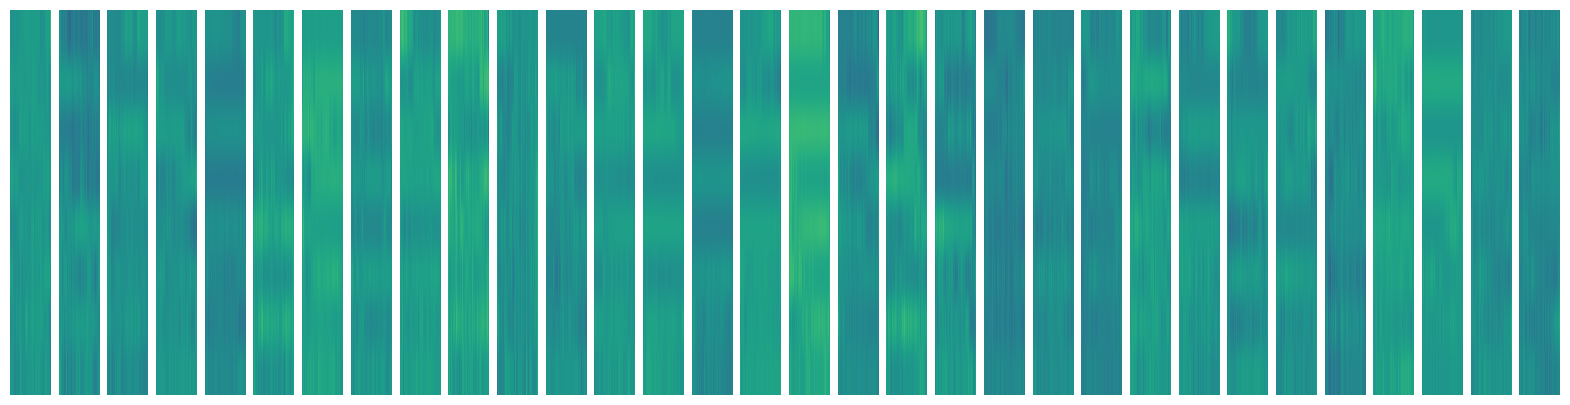

Visualizing filters for layer: conv1d_1


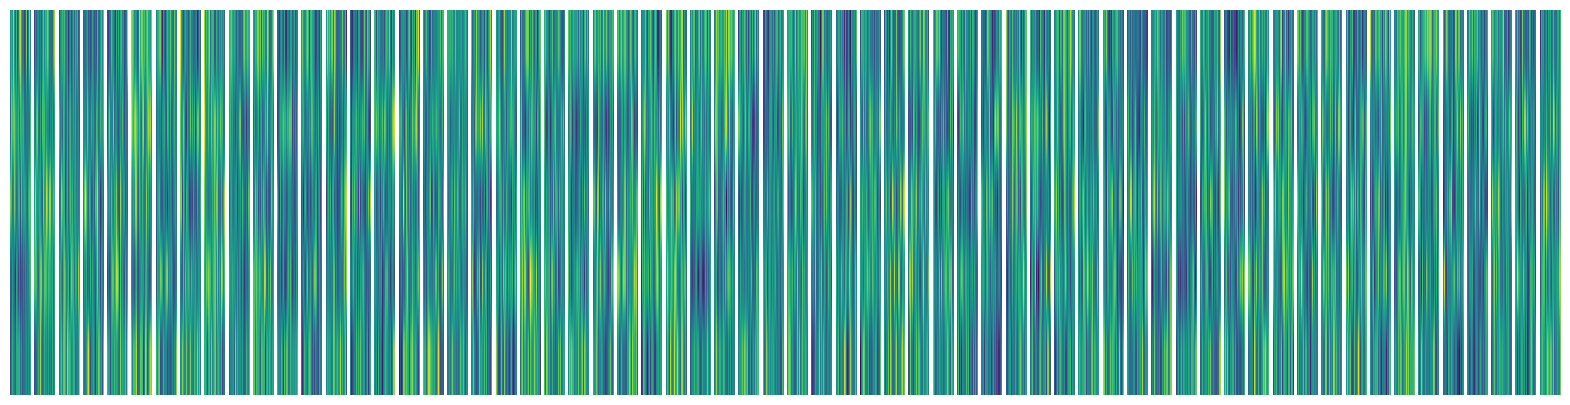

Visualizing filters for layer: conv1d_2


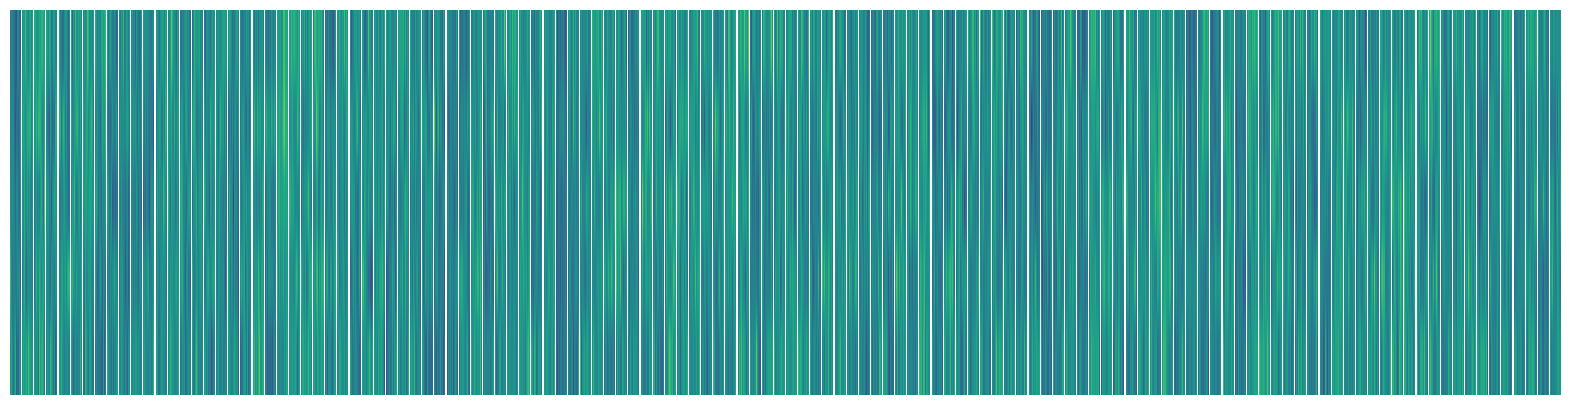

In [8]:

x_train = np.random.rand(10, 20, 25000).astype(np.float32)  # Dummy data for demonstration
cnn_model.predict(x_train[:1])

def visualize_filters(model, layer_name):
    """
    Visualize the filters of a convolutional layer.
    
    Parameters:
    model (tensorflow.keras.Model): The trained model.
    layer_name (str): The name of the convolutional layer.
    """
    layer = model.get_layer(name=layer_name)
    filters, biases = layer.get_weights()
    
    # Normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    
    n_filters = filters.shape[-1]
    fig, axes = plt.subplots(1, n_filters, figsize=(20, 5))
    
    for i in range(n_filters):
        f = filters[:, :, i]
        axes[i].imshow(f, aspect='auto', cmap='viridis')
        axes[i].axis('off')
    
    plt.show()

# Get the names of the convolutional layers
conv_layer_names = [layer.name for layer in cnn_model.layers if isinstance(layer, tf.keras.layers.Conv1D)]

# Visualize the filters for each convolutional layer
for layer_name in conv_layer_names:
    print(f"Visualizing filters for layer: {layer_name}")
    visualize_filters(cnn_model, layer_name)

In [ ]:
# test_data = load_mfcc_files(r'C:\Users\Dnyaneshwari\Desktop\DS FINAL\csv_new_resize\csv_new_resize')
# prediction = models.predict(test_data) 
# print(prediction)
'''
import os
import numpy as np
from tensorflow.keras.models import load_model

# Path to the folder containing MFCC files
mfcc_folder_path = r'C:\Users\Dnyaneshwari\Desktop\DS FINAL\csv_new_resize\csv_new_resize'

# Load your trained model
  # Replace with the actual path to your saved model
model = load_model(cnn_model)

# Helper function to load and preprocess each MFCC file
def load_and_preprocess_mfcc(file_path, target_shape):
    # Load MFCC data (assuming numpy format, adjust if different format)
    mfcc_data = np.load(file_path)  # Use np.load() if .npy files, use pd.read_csv() for .csv files
    # Check if resizing is needed
    if mfcc_data.shape != target_shape:
        # Resize or pad the data to fit the target shape
        mfcc_data = np.resize(mfcc_data, target_shape)
    # Normalize data if needed (e.g., scaling between 0 and 1)
    mfcc_data = mfcc_data / np.max(np.abs(mfcc_data))
    return mfcc_data

# Define the expected input shape for the model
# Update target_shape based on your model's input dimensions
target_shape = (20, 25000)  # Replace n_mfcc and time_steps with your model's expected dimensions

# Prepare data for prediction
mfcc_data_list = []
file_names = []
for file_name in os.listdir(mfcc_folder_path):
    if file_name.endswith('.npy'):  # Assuming MFCC files are saved as .npy, change if using .csv
        file_path = os.path.join(mfcc_folder_path, file_name)
        mfcc_data = load_and_preprocess_mfcc(file_path, target_shape)
        mfcc_data_list.append(mfcc_data)
        file_names.append(file_name)

# Convert the list to a numpy array with the correct shape for model input
mfcc_data_array = np.array(mfcc_data_list)
# Reshape to add an additional dimension if your model expects it (e.g., for channels)
mfcc_data_array = mfcc_data_array.reshape(mfcc_data_array.shape[0], *target_shape, 1)  # Add 1 for the channels dimension (if needed)

# Make predictions
predictions = model.predict(mfcc_data_array)

# Display predictions
for i, prediction in enumerate(predictions):
    print(f"File: {file_names[i]} - Prediction: {prediction}")
'''



TypeError: isdir: s should be string, bytes, os.PathLike or integer, not Sequential